In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

data = pd.read_csv("/content/thyroidDF.csv")


In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
data.shape

(9172, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U','FTI_measured','TBG_measured','referral_source','patient_id','T4U_measured',],axis=1,inplace=True)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.3,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128.0,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,36.0,S


In [ ]:
data['target']

0       -
1       -
2       -
3       -
4       S
       ..
9167    -
9168    -
9169    I
9170    -
9171    -
Name: target, Length: 9172, dtype: object

In [ ]:
diagnoses ={'A': 'hyperthyroid conditions',
            'B': 'hyperthyroid conditions',
            'C': 'hyperthyroid conditions',
            'D': 'hyperthyroid conditions',
            'E': 'hyperthyroid conditions',
            'F': 'hyperthyroid conditions',
            'G': 'hyperthyroid conditions',
            'H': 'hyperthyroid conditions',
            'I': 'binding protein',
            'J': 'binding protein',
            'K': 'general health',
            'L': 'replacement therapy',
            'M': 'replacement therapy',
            'N': 'replacement therapy',
            'O': 'antithyroid treatment',
            'P': 'antithyroid treatment',
            'Q': 'antithyroid treatment',
            'R': 'miscellaneous',
            'S': 'miscellaneous',
            'T': 'miscellaneous'}
data['target']=data['target'].map(diagnoses)

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,11.0,NaN
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,26.0,NaN
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,36.0,miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64.0,77.0,NaN,NaN
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91.0,99.0,NaN,NaN
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,113.0,89.0,NaN,binding protein
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75.0,88.0,NaN,NaN


In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
FTI                     802
TBG                    8823
target                 6935
dtype: int64

In [ ]:
data.dropna(subset=['target'],inplace=True)

In [ ]:
data['target'].value_counts()

hyperthyroid conditions    775
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
antithyroid treatment       33
Name: target, dtype: int64

In [ ]:
data['target'].isnull().sum()

0

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG,target
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,47.0,NaN,hyperthyroid conditions
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,39.0,NaN,miscellaneous
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,91.0,NaN,binding protein
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,92.0,NaN,replacement therapy


In [ ]:
data.describe()

,age,TSH,T3,TT4,FTI,TBG
count,2237.000000,2087.000000,1643.000000,2140.000000,2060.000000,98.000000
mean,52.792579,14.930791,1.961875,116.390495,120.363369,47.717347
std,19.677450,46.204092,1.452238,60.351600,70.996728,32.398750
min,1.000000,0.005000,0.050000,2.000000,1.400000,9.299999
25%,36.000000,0.255000,1.000000,76.000000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.000000,109.000000,36.000000
75%,69.000000,8.799999,2.500000,156.000000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,881.000000,200.000000


In [ ]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG,target


In [ ]:
data['age']=np.where((data.age>100), np.nan, data.age)

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG,target
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,47.0,NaN,hyperthyroid conditions
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,39.0,NaN,miscellaneous
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,91.0,NaN,binding protein
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,92.0,NaN,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,56.0,NaN,general health
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,32.0,NaN,general health
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,83.0,NaN,binding protein
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,67.0,NaN,binding protein


#splitting the data values as x and y

In [ ]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [ ]:
data.isnull().sum()

age                       0
sex                      90
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
FTI                     177
TBG                    2139
target                    0
dtype: int64

In [ ]:
x['sex'].unique()


array(['F', 'M', nan], dtype=object)

In [ ]:
x['sex'].replace(np.nan,'F',inplace=True)


In [ ]:
x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [ ]:
x.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
FTI                     177
TBG                    2139
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [ ]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

# converting categorical to numerical values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


In [ ]:
ordinal_encoder = OrdinalEncoder(dtype = 'int64')


In [ ]:
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


<ipython-input-33-b95c0f3e3122>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,68.000000,NaN,48.0,47.0,NaN
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.050000,1.6,39.0,39.0,NaN
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.050000,NaN,126.0,91.0,NaN
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,9.599999,2.4,136.0,92.0,NaN


In [ ]:
x.replace(np.nan, '0', inplace=True)
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,68.0,0,48.0,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.05,1.6,39.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.05,0,126.0,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,9.599999,2.4,136.0,92.0,0


In [ ]:
label_encoder = LabelEncoder()
y_dt= label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt, columns=['targat'])
y

,targat
0,4
1,3
2,4
3,1
4,5
...,...
2232,2
2233,2
2234,1
2235,1


In [ ]:
y.value_counts(normalize=True)

targat
3         0.346446
2         0.194904
1         0.168082
5         0.150201
4         0.125615
0         0.014752
dtype: float64

# Checking the Correlation

<ipython-input-39-a24c1ce48ab6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


<Axes: >

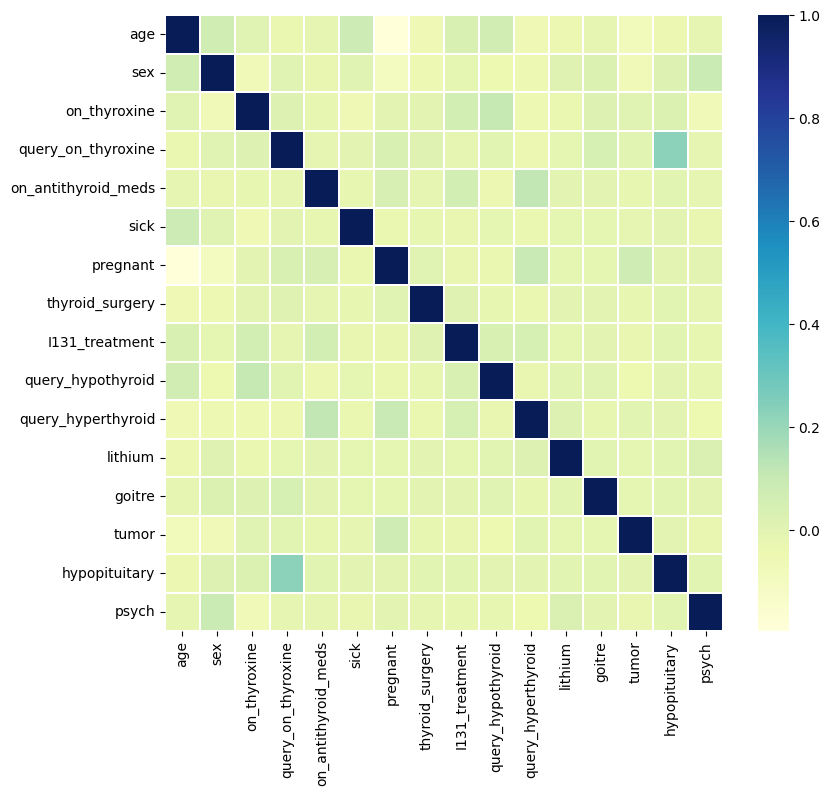

In [ ]:
import seaborn as sns 
corrmat = x.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# splitting the train and test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
y_train.value_counts()

targat
3         615
2         351
1         302
5         265
4         230
0          26
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)


In [ ]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG
0,20.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,41.0
1,49.000000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,7.4,1.9,101.0,122.0,0.0
2,74.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.2,0.9,99.0,100.0,0.0
3,25.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1.0,3.2,117.0,105.0,0.0
4,48.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.3,8.9,212.0,240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,29.604751,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.150223,1.123325,210.604751,187.046081,0.0
3686,55.829705,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.043403,3.076605,203.021218,185.191513,0.0
3687,49.951632,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.281777,1.205623,183.379081,163.048368,0.0
3688,20.555699,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.231423,0.98577,155.825499,176.809401,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_test_bal= sc.fit_transform(x_test_bal)

In [ ]:
x_bal

array([[-1.61400329, -0.42164543, -0.45764564, ..., -1.71040381,
        -1.44361817,  2.88735696],
       [-0.11257649, -0.42164543,  2.18509677, ..., -0.0713011 ,
         0.23652483, -0.20806903],
       [ 1.18175696,  2.37166093, -0.45764564, ..., -0.10375858,
        -0.06645178, -0.20806903],
       ...,
       [-0.06330731, -0.42164543,  2.18509677, ...,  1.26560755,
         0.80182915, -0.20806903],
       [-1.58523289, -0.42164543,  2.18509677, ...,  0.81844765,
         0.99134148, -0.20806903],
       [ 0.87355885, -0.42164543,  2.18509677, ...,  1.58093768,
         1.62286358, -0.20806903]])

In [ ]:
x_test_bal

array([[-1.53233816, -0.388689  , -0.47545099, ...,  0.93543564,
         0.26662772, -0.19904085],
       [-0.88020071, -0.388689  , -0.47545099, ...,  0.58380846,
        -0.21034555, -0.19904085],
       [-0.9345455 ,  2.57275098, -0.47545099, ..., -1.12846299,
        -0.87280844, -0.19904085],
       ...,
       [-0.48780113, -0.388689  ,  2.10326623, ...,  1.2420299 ,
         1.0718705 , -0.19904085],
       [ 1.04365113, -0.388689  ,  2.10326623, ...,  1.24014441,
         1.16495   , -0.19904085],
       [ 0.76610626, -0.388689  ,  2.10326623, ..., -1.01470988,
        -0.86025576, -0.19904085]])

In [ ]:
y_bal.value_counts()

targat
0         615
1         615
2         615
3         615
4         615
5         615
dtype: int64

In [ ]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','FTI','TBG']

In [ ]:
x_test_bal= pd.DataFrame(x_test_bal,columns=columns)


In [ ]:
x_bal= pd.DataFrame(x_bal,columns=columns)

In [ ]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,FTI,TBG
0,-1.614003,-0.421645,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.328415,-1.117160,-1.710404,-1.443618,2.887357
1,-0.112576,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.095125,0.392630,-0.071301,0.236525,-0.208069
2,1.181757,2.371661,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.290584,-0.401996,-0.103759,-0.066452,-0.208069
3,-1.355137,-0.421645,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,8.205689,-0.023287,-0.102006,-0.296889,1.425644,0.188359,0.002407,-0.208069
4,-0.164350,-0.421645,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.318957,5.955015,1.730089,1.861581,-0.208069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,-1.116733,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.323679,-0.224536,1.707446,1.132318,-0.208069
3686,0.241020,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.327047,1.327591,1.584375,1.106777,-0.208069
3687,-0.063307,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.319532,-0.159140,1.265608,0.801829,-0.208069
3688,-1.585233,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.05712,-0.049447,-0.121867,-0.023287,-0.102006,-0.321119,-0.333842,0.818448,0.991341,-0.208069


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rfr = RandomForestClassifier().fit(x_bal,y_bal)
y_pred = rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape


<ipython-input-52-6d5608ec0a6a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestClassifier().fit(x_bal,y_bal)


((3690, 21), (3690, 1), (960, 21), (960, 1))

In [ ]:
test_score=accuracy_score(y_test_bal,y_pred)

test_score

0.90625

In [ ]:
train_score = accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

# performing features impotance

In [ ]:
#perform feature importance
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr,x_bal,y_bal, scoring='accuracy')

feature: age                  score: 0.0


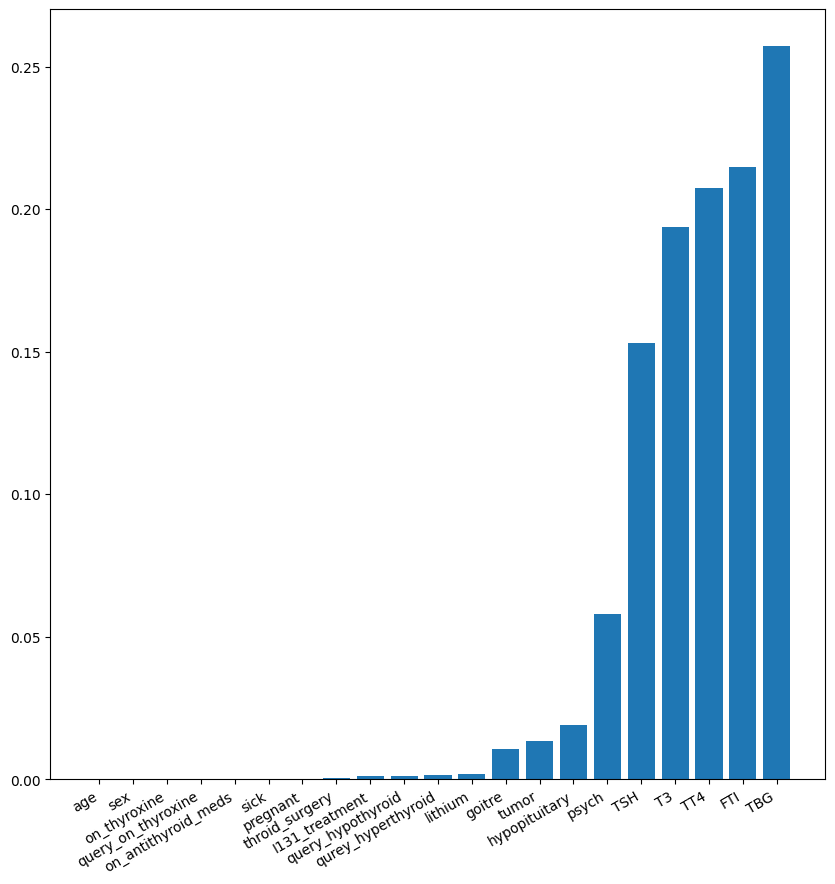

feature: sex                  score: 0.0


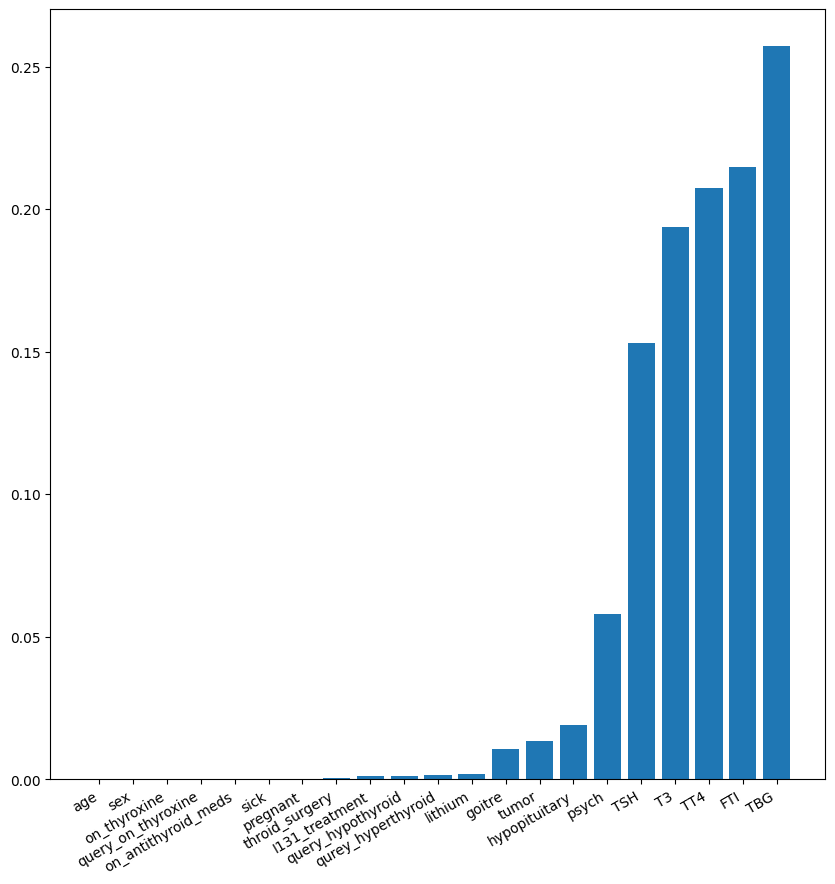

feature: on_thyroxine         score: 0.0


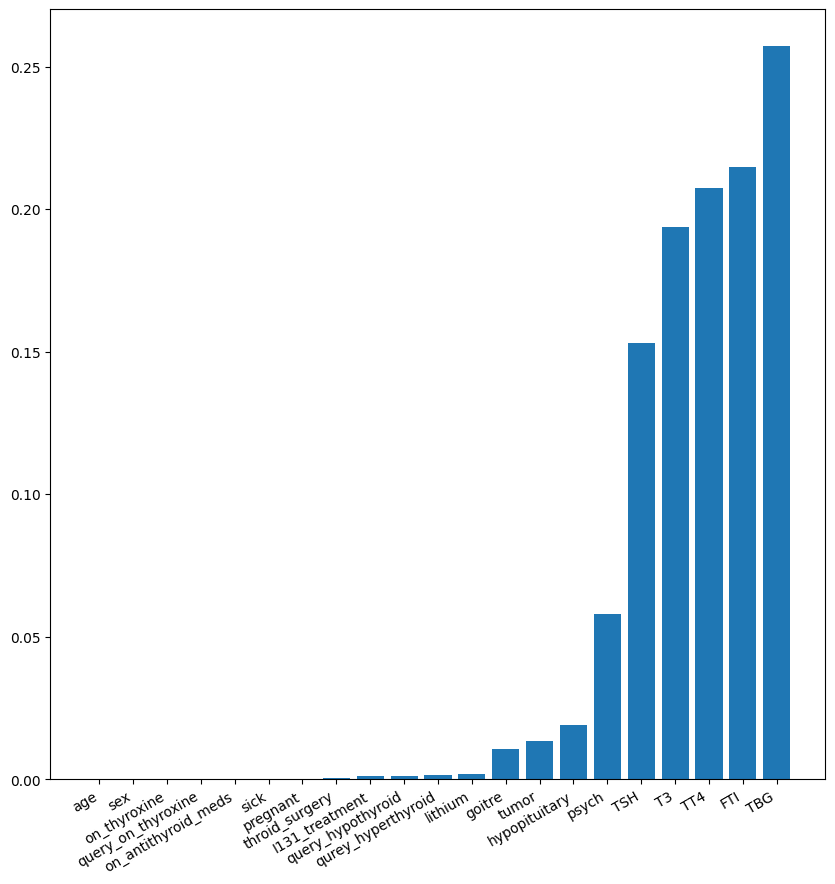

feature: query_on_thyroxine   score: 0.0


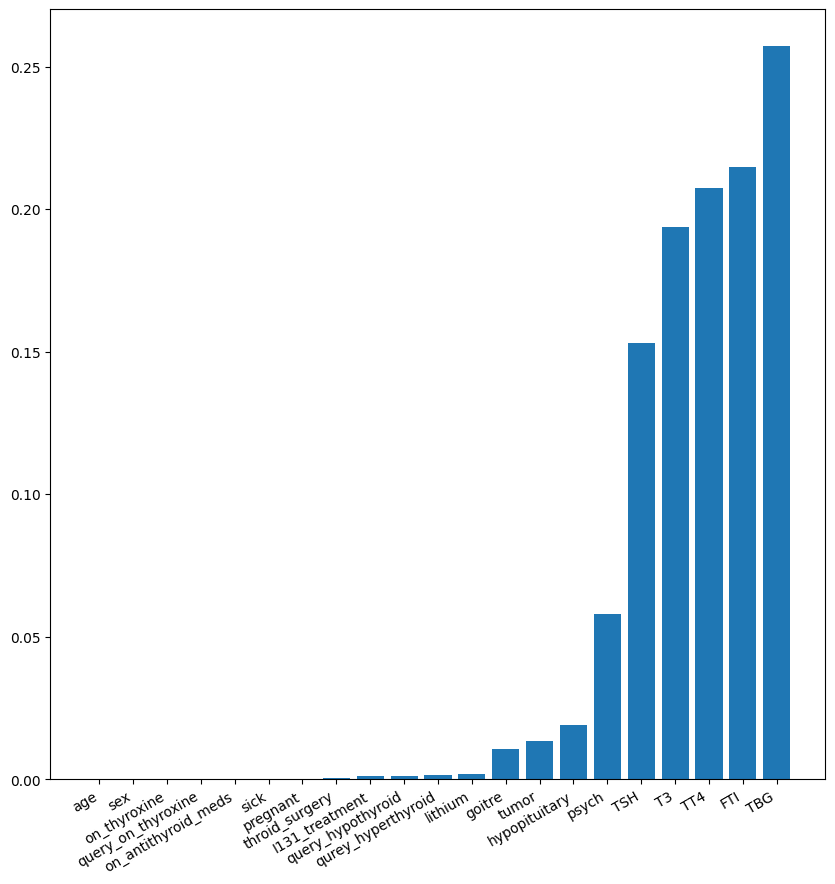

feature: on_antithyroid_meds  score: 5.420054200542257e-05


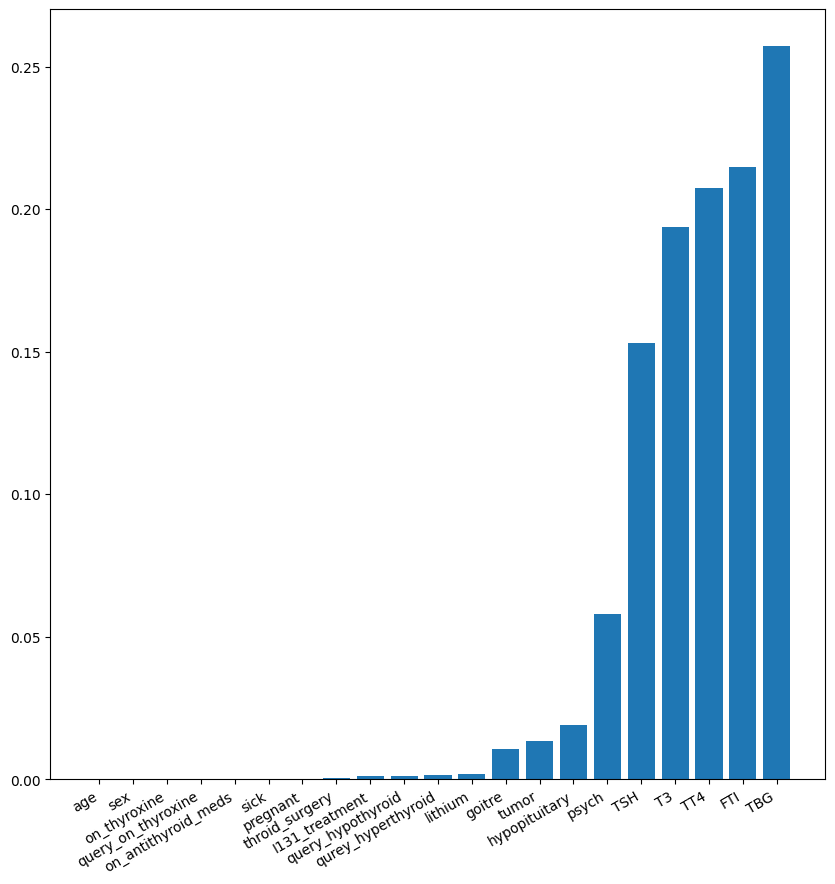

feature: sick                 score: 5.420054200542257e-05


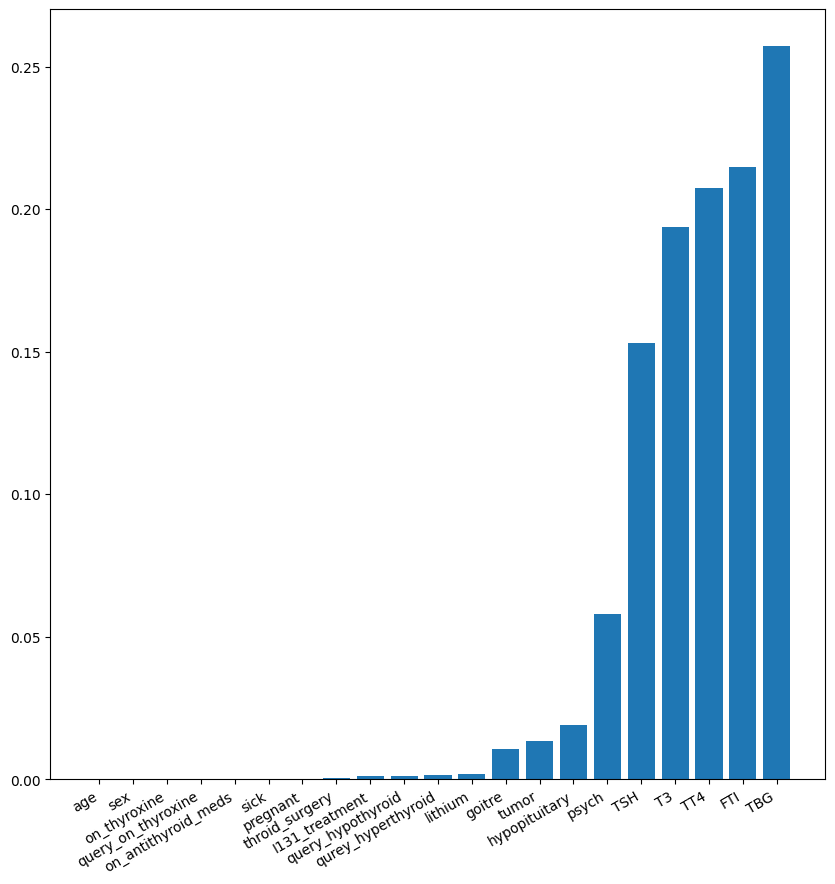

feature: pregnant             score: 0.00010840108401084514


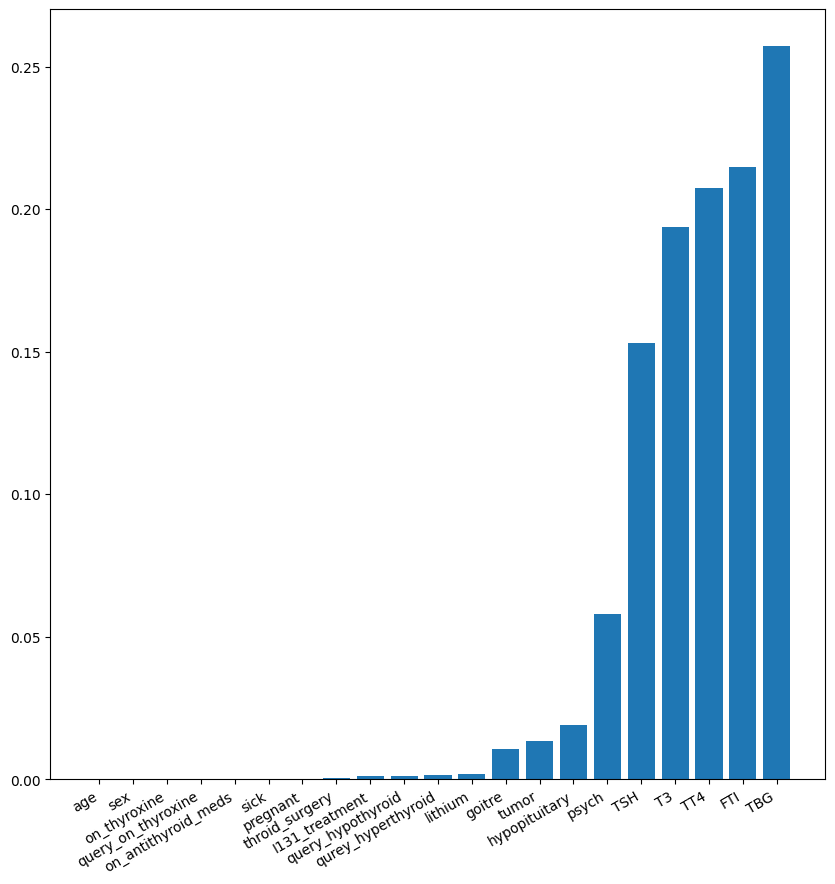

feature: throid_surgery       score: 0.000379403794037958


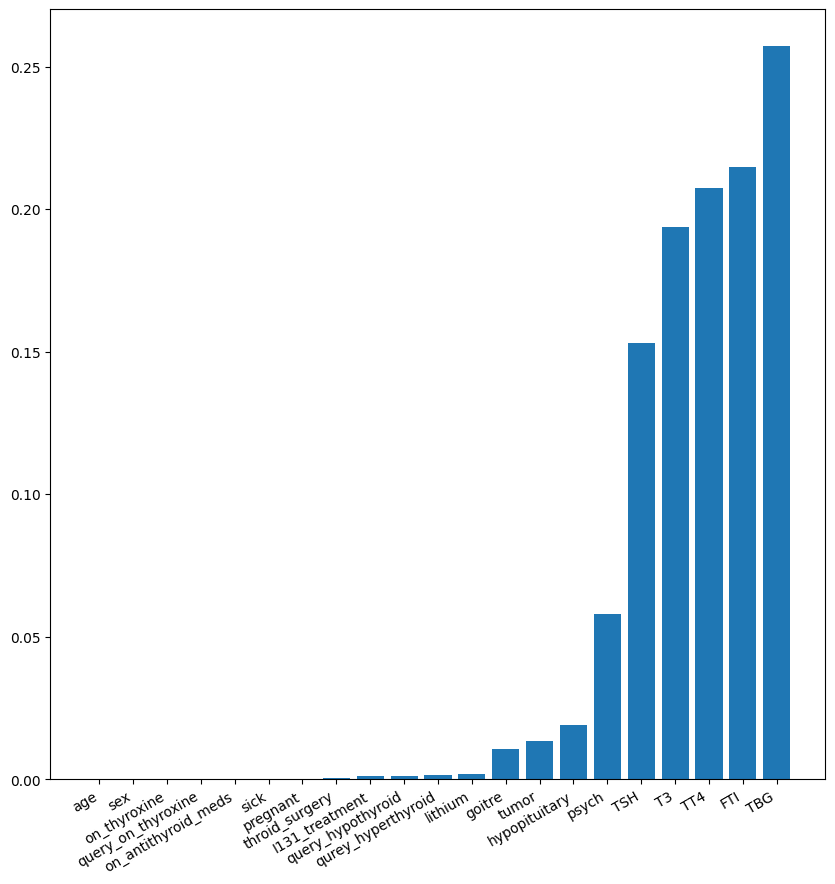

feature: I131_treatment       score: 0.0010840108401084514


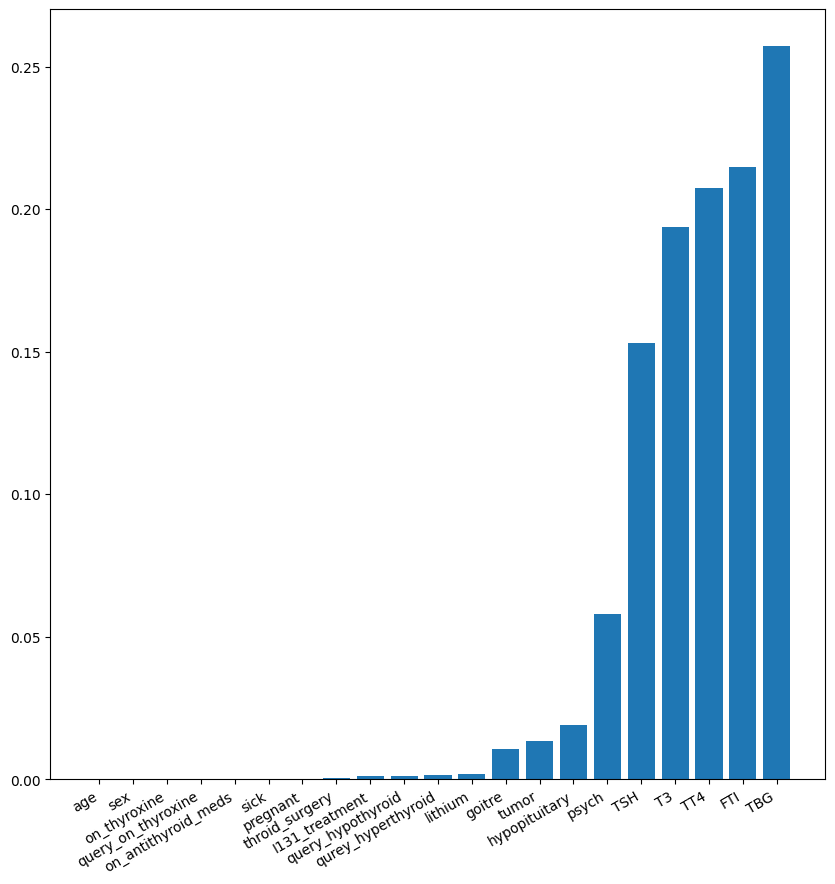

feature: query_hypothyroid    score: 0.0012466124661246747


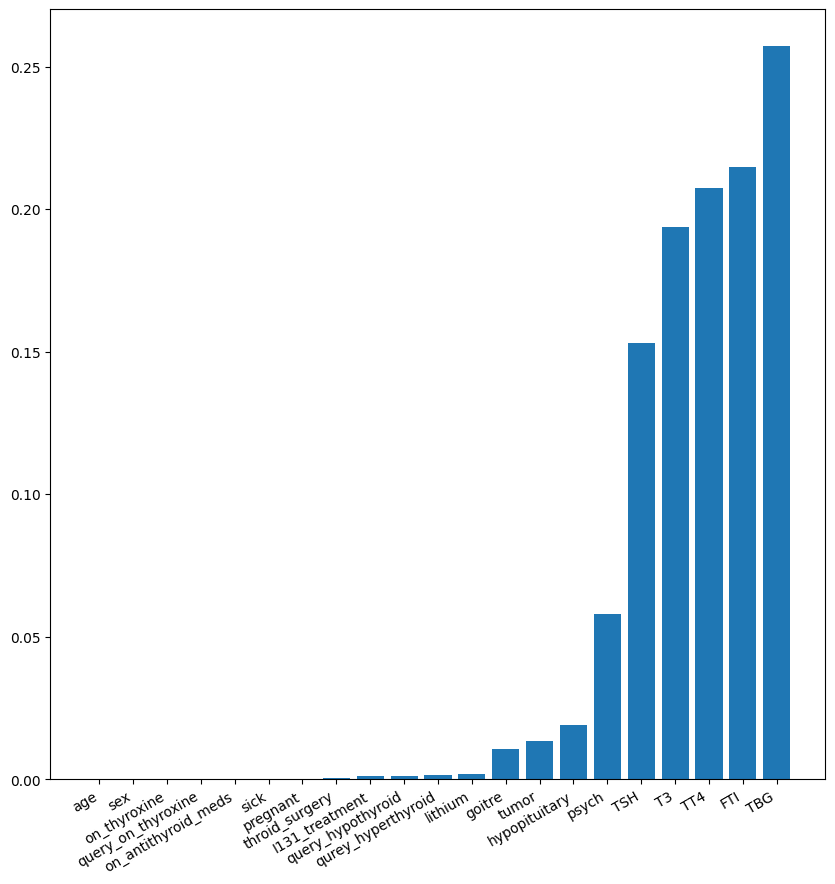

feature: qurey_hyperthyroid   score: 0.001626016260162566


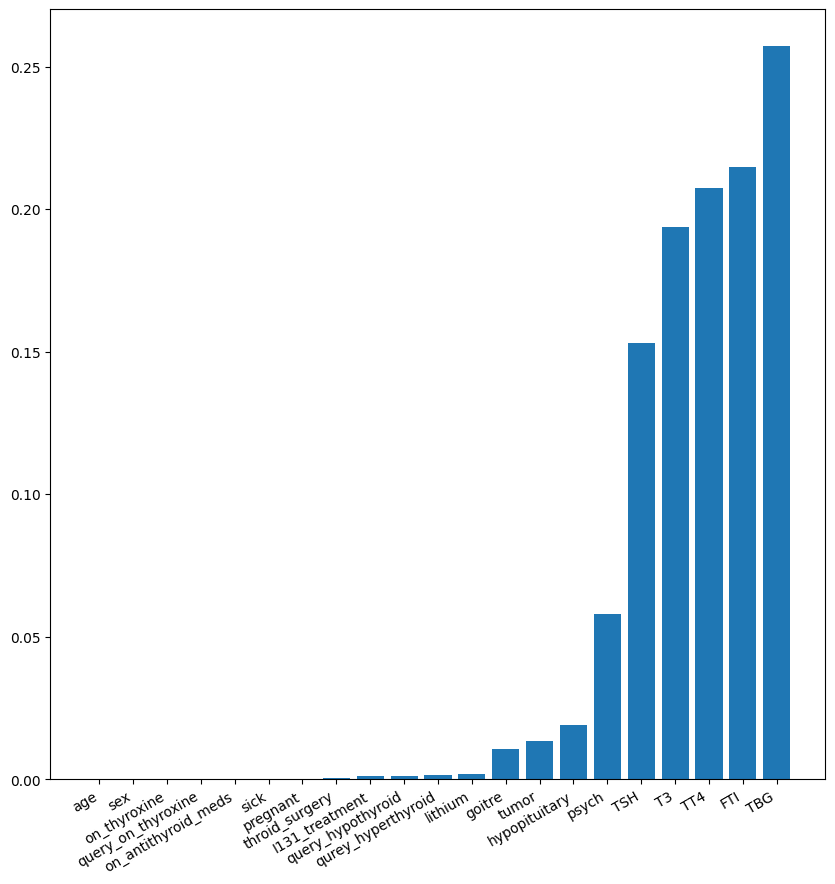

feature: lithium              score: 0.0017344173441734112


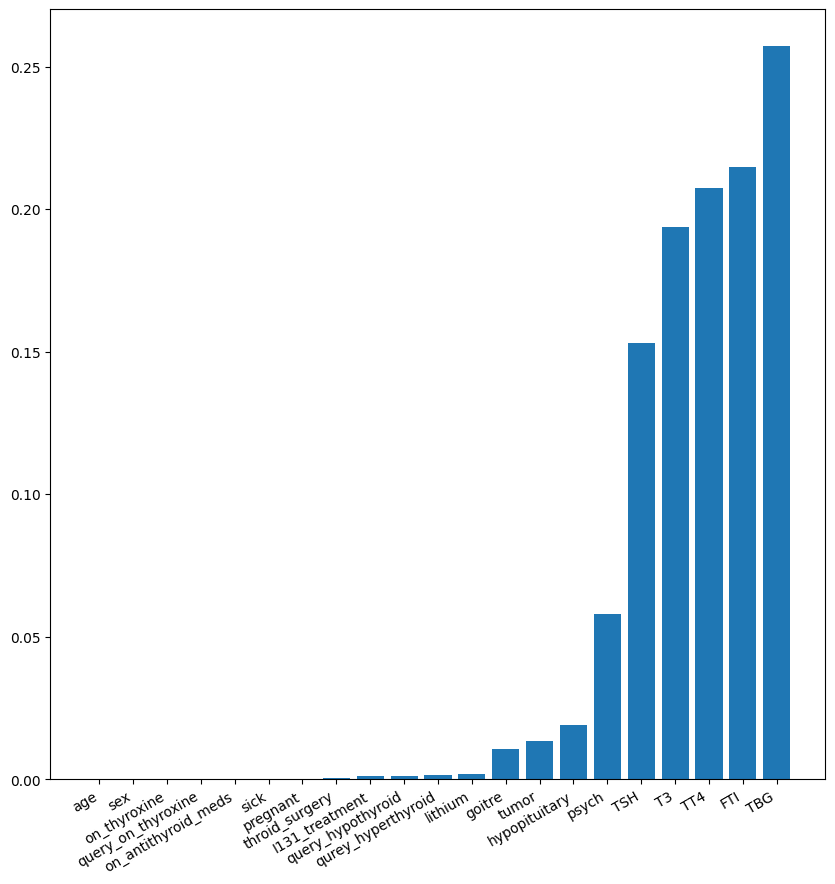

feature: goitre               score: 0.010623306233062336


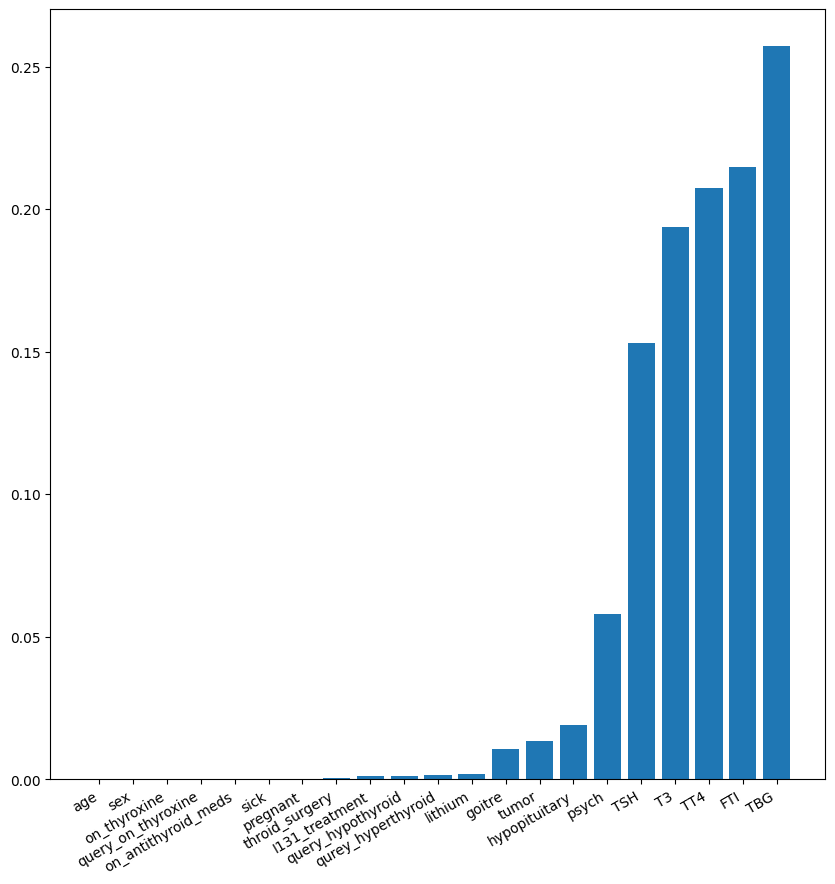

feature: tumor                score: 0.013441734417344198


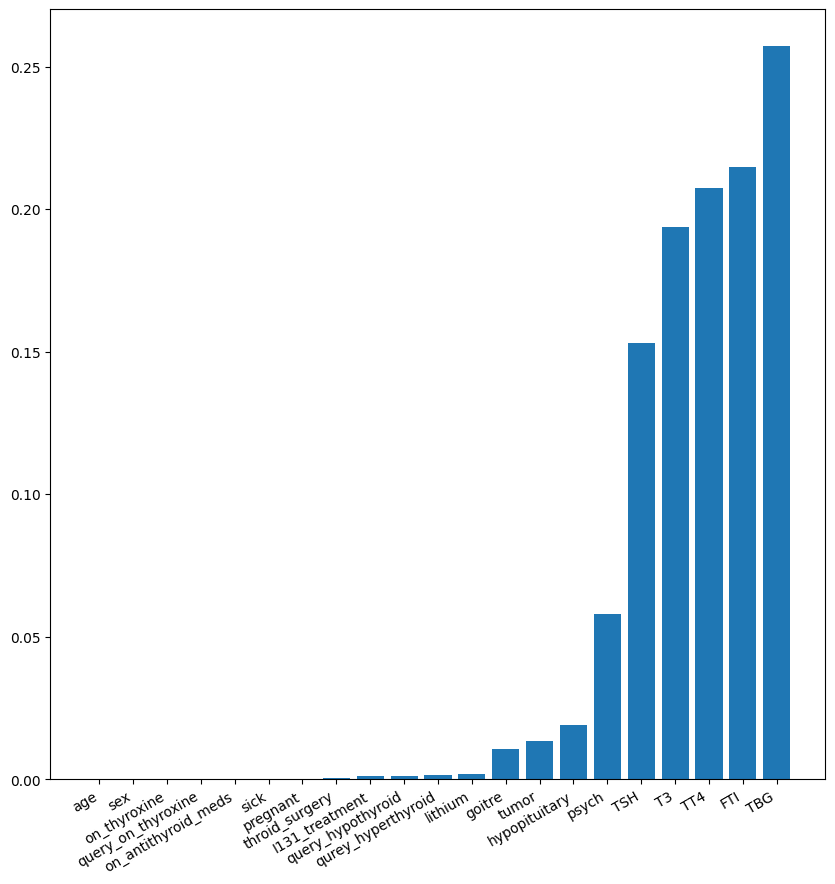

feature: hypopituitary        score: 0.019241192411924124


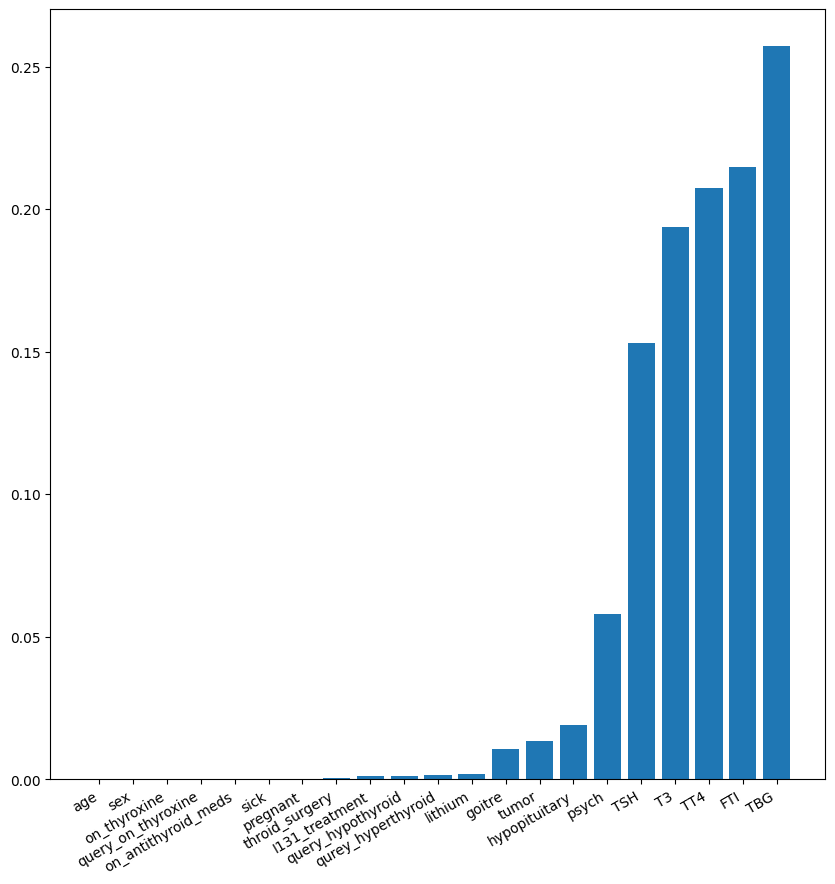

feature: psych                score: 0.057994579945799464


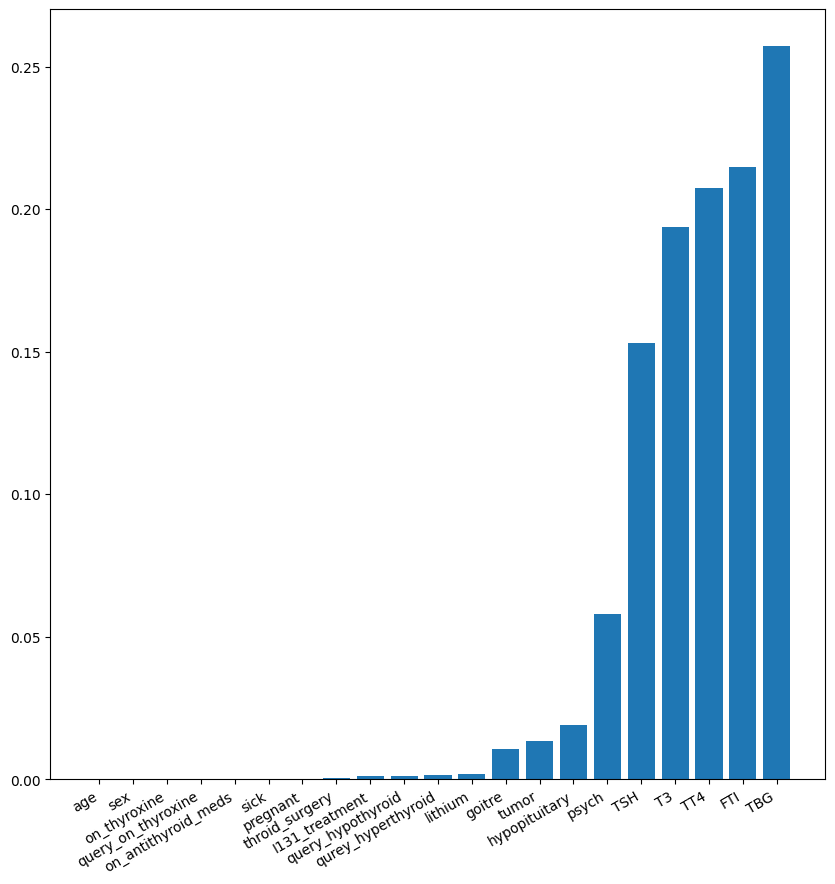

feature: TSH                  score: 0.1531707317073171


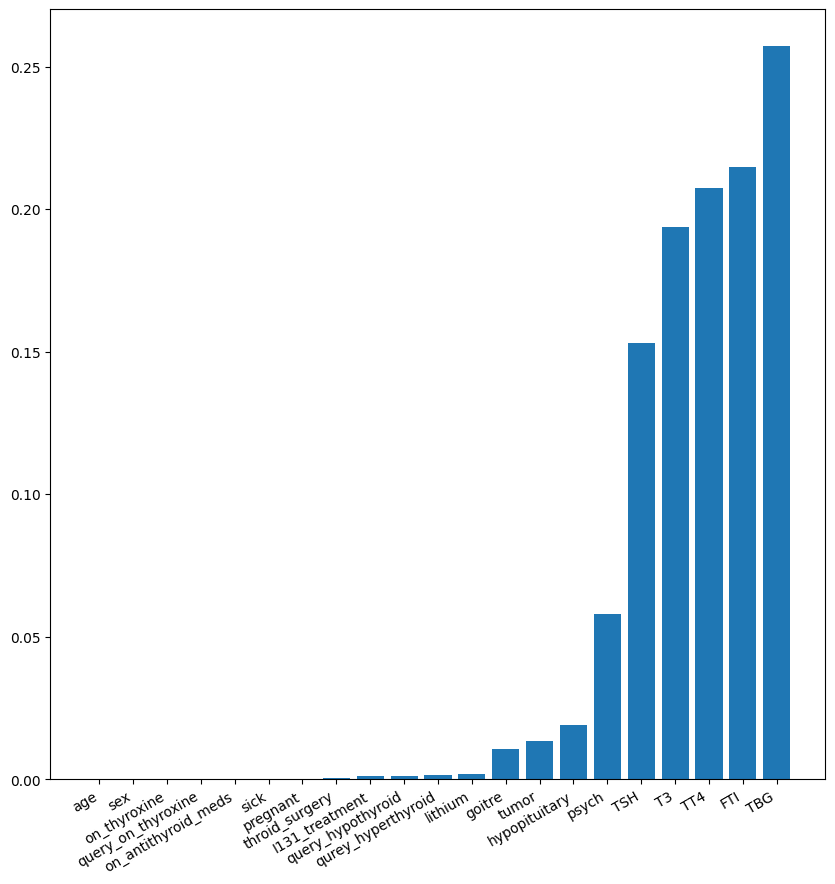

feature: T3                   score: 0.19371273712737125


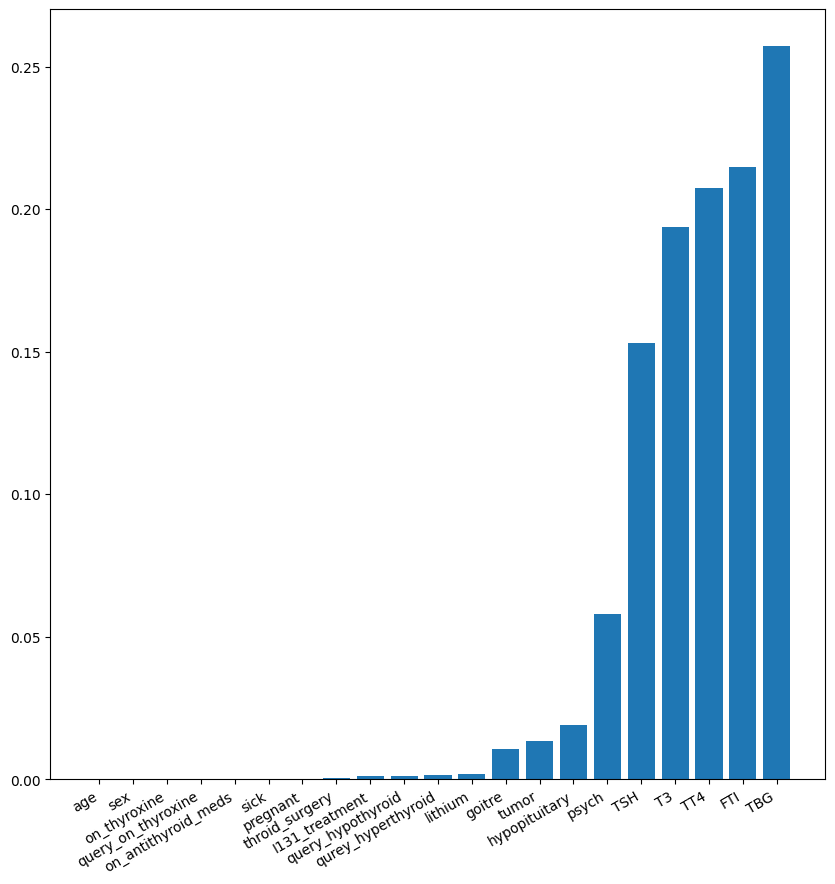

feature: TT4                  score: 0.2075880758807588


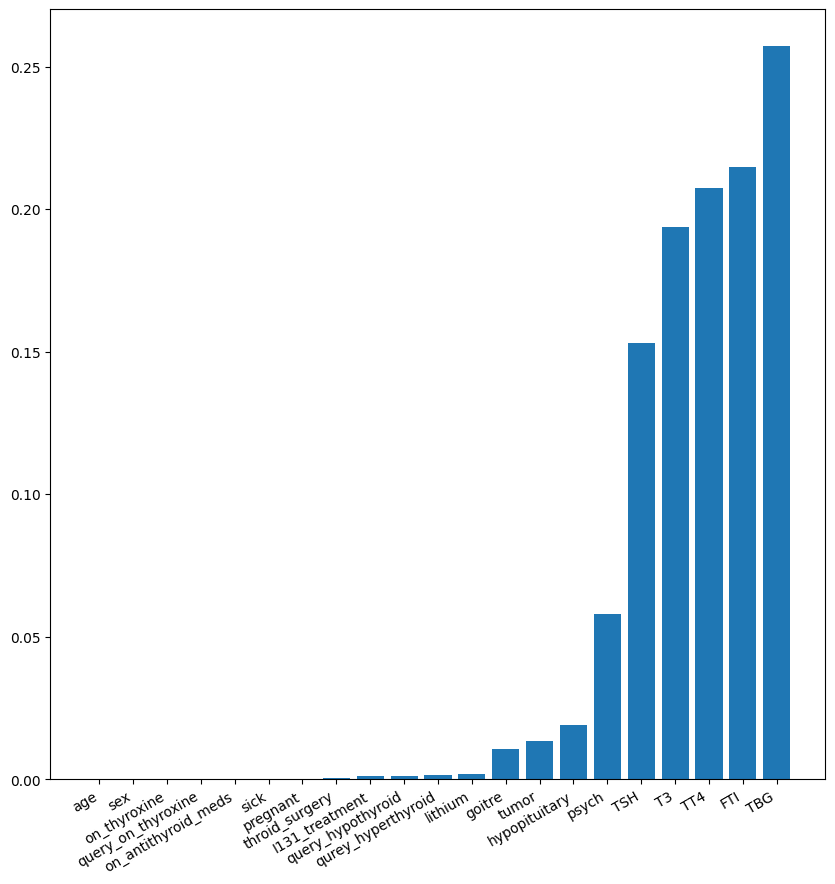

feature: FTI                  score: 0.2149593495934959


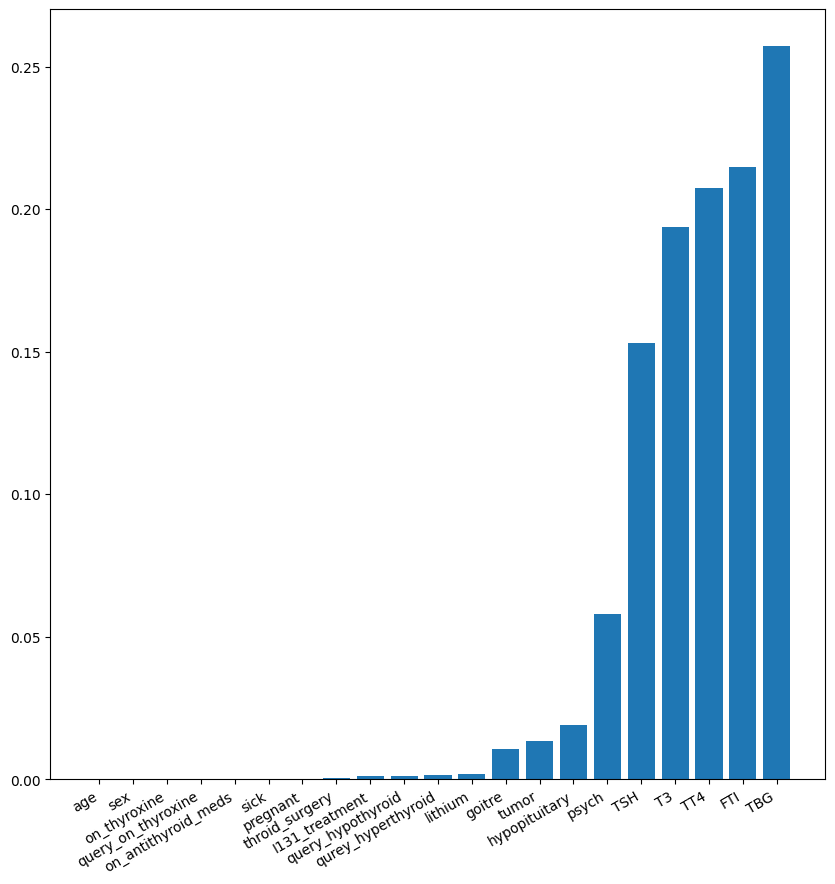

feature: TBG                  score: 0.257289972899729


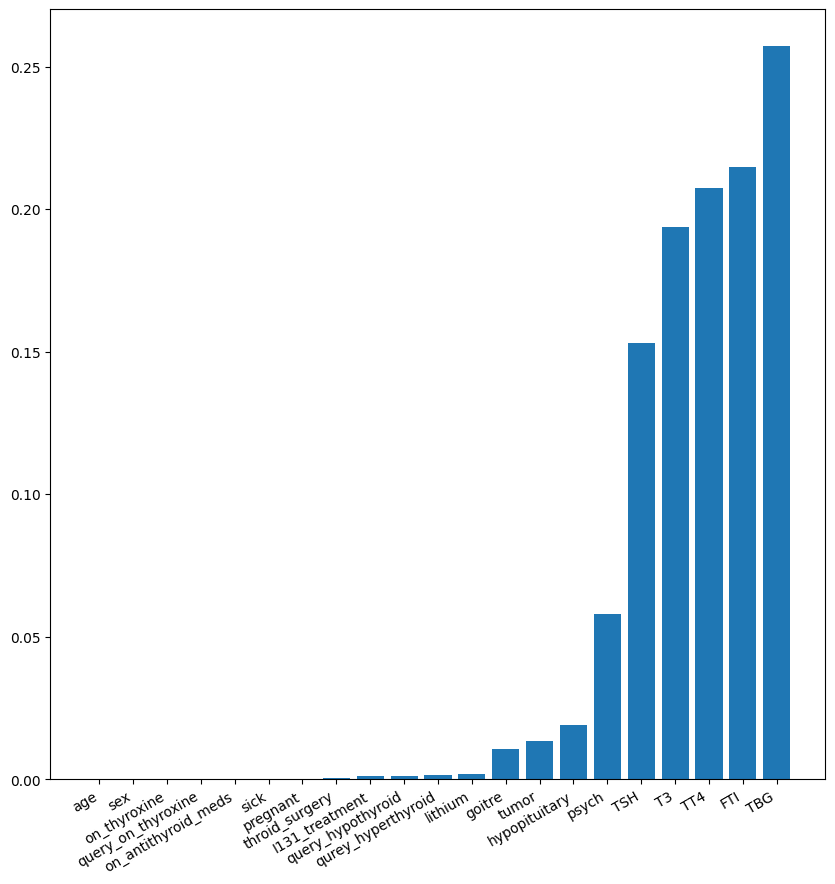

In [ ]:
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','throid_surgery','I131_treatment','query_hypothyroid','qurey_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','FTI','TBG']
importance = results.importances_mean
importance = np.sort(importance)
for i,v in enumerate(importance):
  i=feature_importance[i]
  print('feature: {:<20} score: {}'. format(i,v))
  
  plt.figure(figsize=(10,10))
  plt.bar(x=feature_importance, height= importance)
  plt.xticks(rotation=30, ha='right') 
  plt.show()

In [ ]:
x_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','FTI','TBG'],axis=1 , inplace=True)

In [ ]:
x_test_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hypothyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','FTI','TBG'],axis=1 , inplace=True)

In [ ]:
x_bal.head()

,query_hyperthyroid
0,-0.211504
1,-0.211504
2,-0.211504
3,-0.211504
4,4.728047


In [ ]:
x_test_bal.head()

,query_hyperthyroid
0,-0.246523
1,-0.246523
2,-0.246523
3,-0.246523
4,-0.246523


In [ ]:
rfr1 =RandomForestClassifier()
rfr1.fit(x_bal,y_bal)
y_pred=rfr1.predict(x_test_bal)

<ipython-input-61-bace83f58617>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(x_bal,y_bal)


In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30       160
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00       160
           3       0.47      0.16      0.24       160
           4       0.00      0.00      0.00       160
           5       0.00      0.00      0.00       160

    accuracy                           0.19       960
   macro avg       0.11      0.19      0.09       960
weighted avg       0.11      0.19      0.09       960



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_score = accuracy_score(y_bal,rfr1.predict(x_bal))

In [ ]:
train_score

0.18943089430894308

# XGBClassifier Model-2

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred=xgb.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30       160
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00       160
           3       0.47      0.16      0.24       160
           4       0.00      0.00      0.00       160
           5       0.00      0.00      0.00       160

    accuracy                           0.19       960
   macro avg       0.11      0.19      0.09       960
weighted avg       0.11      0.19      0.09       960



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_score = accuracy_score(y_bal, xgb.predict(x_bal))
train_score

0.18943089430894308

# SVC Model-3

In [ ]:
params = {
    'C' : [0.01, 1, 10,100, 1000],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sv= SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_svc = GridSearchCV(sv,params,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
x_bal

,query_hyperthyroid
0,-0.211504
1,-0.211504
2,-0.211504
3,-0.211504
4,4.728047
...,...
3685,-0.211504
3686,-0.211504
3687,-0.211504
3688,-0.211504


In [ ]:
sv.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30       160
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00       160
           3       0.47      0.16      0.24       160
           4       0.00      0.00      0.00       160
           5       0.00      0.00      0.00       160

    accuracy                           0.19       960
   macro avg       0.11      0.19      0.09       960
weighted avg       0.11      0.19      0.09       960



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.18943089430894308

# Grid_Search for RandomForest

In [ ]:
from sklearn.metrics.cluster import entropy
params={
    'n_estimators' :[100, 200, 500],
    'criterion': ['gini','entropy'],
    'max_depth': [x for x in range(1,20)]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search =GridSearchCV(rfr1, params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 500}

In [ ]:
xgb1=XGBClassifier(booster='gbtree', gamna= 0, learning_rate= 0.1, n_estimators= 500)

In [ ]:
xgb1.fit(x_bal,y_bal)

[14:55:47] WARNING: ../src/learner.cc:767: 
Parameters: { "gamna" } are not used.



XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gamna=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred= xgb1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30       160
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00       160
           3       0.47      0.16      0.24       160
           4       0.00      0.00      0.00       160
           5       0.00      0.00      0.00       160

    accuracy                           0.19       960
   macro avg       0.11      0.19      0.09       960
weighted avg       0.11      0.19      0.09       960



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_score= accuracy_score(y_bal,xgb1.predict(x_bal))
train_score

0.18943089430894308

# Grid_Search for SVC

In [ ]:
params = {
    'C' : [0.01, 1, 10,100, 1000],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sv= SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_svc = GridSearchCV(sv,params,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
x_bal

,query_hyperthyroid
0,-0.211504
1,-0.211504
2,-0.211504
3,-0.211504
4,4.728047
...,...
3685,-0.211504
3686,-0.211504
3687,-0.211504
3688,-0.211504


In [ ]:
grid_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
sv1=SVC(C =1000,gamma=1, kernel= 'rbf')

In [ ]:
sv1.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, gamma=1)

In [ ]:
y_pred= sv1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30       160
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00       160
           3       0.47      0.16      0.24       160
           4       0.00      0.00      0.00       160
           5       0.00      0.00      0.00       160

    accuracy                           0.19       960
   macro avg       0.11      0.19      0.09       960
weighted avg       0.11      0.19      0.09       960



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_score= accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.18943089430894308

In [ ]:
# saving the model
import pickle
pickle.dump(xgb1,open('thyroid_1_model.pkl','wb'))

In [ ]:
features = np.array([(0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0)])
#print(label_encoder.inverse_transform(xgb.predict(features)))

In [ ]:
type(features)

numpy.ndarray

In [ ]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [ ]:
data['target'].unique()

array(['miscellaneous', 'hyperthyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'antithyroid treatment'],
      dtype=object)